In [4]:
# GOAL: check if the elbow method applied on the statistic of the KS Test 
# could give as good results as the energy test. 
# INTUITION: maybe the threshold of 0.05 p-value is not adapt for this problem

In [1]:
import pandas as pd
import numpy as np
import sys
sys.path.append("../lib")
import seaborn as sns
import matplotlib.pyplot as plt
from utils import iterate_over
from utils import load_config_and_check
import os

In [2]:
config_train = load_config_and_check("../config/experiment_v09.yaml")
config_test = load_config_and_check("../config/experiment_v10.yaml")

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from analyser import Explorer

## Training: inspect the elbow

In [5]:
exp_train = Explorer(config_train)

BENCHMARK: qasm_bench_mid - PROGRAM INFO - reading ...  
BENCHMARK: tket_bench_1 - PROGRAM INFO - reading ...  
BENCHMARK: across_runs_qiskit - PROGRAM INFO - reading ...  
BENCHMARK: across_runs_cirq - PROGRAM INFO - reading ...  
BENCHMARK: program_vs_random - PROGRAM INFO - reading ...  
BENCHMARK: negation - PROGRAM INFO - reading ...  
BENCHMARK: program_x_vs_program_y - PROGRAM INFO - reading ...  
BENCHMARK: qasm_bench_mid - EXECUTION INFO - reading ...  
BENCHMARK: tket_bench_1 - EXECUTION INFO - reading ...  
BENCHMARK: across_runs_qiskit - EXECUTION INFO - reading ...  
BENCHMARK: across_runs_cirq - EXECUTION INFO - reading ...  
BENCHMARK: program_vs_random - EXECUTION INFO - reading ...  
BENCHMARK: negation - EXECUTION INFO - reading ...  
BENCHMARK: program_x_vs_program_y - EXECUTION INFO - reading ...  
BENCHMARK: qasm_bench_mid - GROUND TRUTH - reading ...  
BENCHMARK: tket_bench_1 - GROUND TRUTH - reading ...  
BENCHMARK: across_runs_qiskit - GROUND TRUTH - reading ...

Reading: 11
Reading: 54
Reading: 62
Reading: 36
Reading: 53
Reading: 7
Reading: 38
Reading: 2
Reading: 48
Reading: 97
Reading: 18
Reading: 27
Reading: 86
Reading: 21
Reading: 40
Reading: 49
Reading: 26
Reading: 44
Reading: 81
Reading: 52
Reading: 46
Reading: 85
Reading: 87
Reading: 99
Reading: 68
Reading: 3
Reading: 73
Reading: 13
Reading: 22
Reading: 75
Reading: 23
Reading: 17
Reading: 15
Reading: 63
Reading: 43
Reading: 35
Reading: 60
Reading: 50
Reading: 61
Reading: 70
Reading: 91
Reading: 82
Reading: 90
Reading: 10
Reading: 74
Reading: 77
Reading: 14
Reading: 28
Reading: 80
Reading: 72
Reading: 9
Reading: 84
Reading: 6
Reading: 45
Reading: 92
Reading: 47
Reading: 95
BENCHMARK: program_vs_random - DETECTOR: ../data/experiment_v09/program_vs_random/predictions/energy - reading ...  
Reading: 56
Reading: 79
Reading: 8
Reading: 69
Reading: 19
Reading: 78
Reading: 39
Reading: 32
Reading: 89
Reading: 96
Reading: 58
Reading: 94
Reading: 33
Reading: 0
Reading: 16
Reading: 30
Reading: 55
Re

<AxesSubplot:xlabel='statistic', ylabel='Count'>

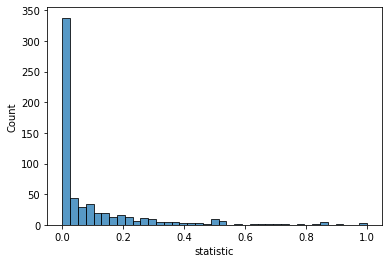

In [6]:
df_internal_train = exp_train.df_all
df_ks = df_internal_train[df_internal_train["test"] == "ks"]
sns.histplot(
    data=df_ks,
    x="statistic"
)

In [7]:
def plot_elbow_with_threshold(df, threshold=0.5):
    """Visualize the elbow diagram with a potential threshold."""
    fig, axes = plt.subplots(1, 3, figsize=(15,3))
    ax_super_zoom = axes[2]
    ax_zoom = axes[1]
    ax_normal = axes[0]

    sns.ecdfplot(
        data=df,
        x="statistic",
        ax=ax_normal
    )
    ax_normal.set_title("Full Scale")

    sns.ecdfplot(
        data=df,
        x="statistic",
        ax=ax_zoom
    )
    ax_zoom.set_xlim(0,0.05)
    ax_zoom.set_title("Zoom")

    sns.ecdfplot(
        data=df,
        x="statistic",
        ax=ax_super_zoom
    )
    ax_super_zoom.set_xlim(0,0.007)
    ax_super_zoom.set_title("Super Zoom")

    THRESHOLD_ON_STATISTIC = .001
    ax_normal.axvline(x=threshold, color='r')
    ax_zoom.axvline(x=threshold, color='r')
    ax_super_zoom.axvline(x=threshold, color='r')
    print(f"We raise an alert for all the data with a statistic higher than: {threshold}")

We raise an alert for all the data with a statistic higher than: 0.02


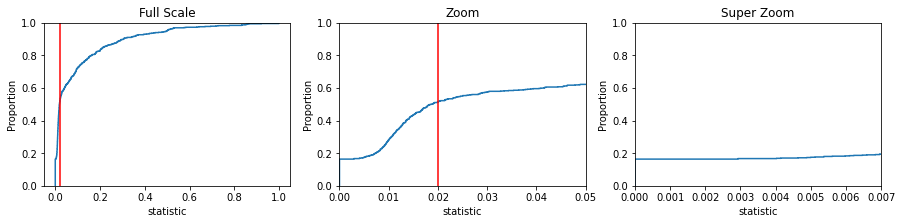

In [8]:
plot_elbow_with_threshold(df=df_ks, threshold=0.02)

## Testing: use the threshold in a real scenario

In [9]:
from copy import deepcopy
exp_test = Explorer(config_test)

exp_test_4_p_val_experiments = deepcopy(exp_test)
exp_test_4_elbow_experiments = deepcopy(exp_test)

BENCHMARK: qasm_bench_mid - PROGRAM INFO - reading ...  
BENCHMARK: tket_bench_1 - PROGRAM INFO - reading ...  
BENCHMARK: across_runs_qiskit - PROGRAM INFO - reading ...  
BENCHMARK: across_runs_cirq - PROGRAM INFO - reading ...  
BENCHMARK: program_vs_random - PROGRAM INFO - reading ...  
BENCHMARK: negation - PROGRAM INFO - reading ...  
BENCHMARK: program_x_vs_program_y - PROGRAM INFO - reading ...  
BENCHMARK: qasm_bench_mid - EXECUTION INFO - reading ...  
BENCHMARK: tket_bench_1 - EXECUTION INFO - reading ...  
BENCHMARK: across_runs_qiskit - EXECUTION INFO - reading ...  
BENCHMARK: across_runs_cirq - EXECUTION INFO - reading ...  
BENCHMARK: program_vs_random - EXECUTION INFO - reading ...  
BENCHMARK: negation - EXECUTION INFO - reading ...  
BENCHMARK: program_x_vs_program_y - EXECUTION INFO - reading ...  
BENCHMARK: qasm_bench_mid - GROUND TRUTH - reading ...  
BENCHMARK: tket_bench_1 - GROUND TRUTH - reading ...  
BENCHMARK: across_runs_qiskit - GROUND TRUTH - reading ...

Reading: 8
Reading: 69
Reading: 19
Reading: 78
Reading: 39
Reading: 32
Reading: 89
Reading: 96
Reading: 58
Reading: 94
Reading: 33
Reading: 0
Reading: 16
Reading: 30
Reading: 55
Reading: 34
Reading: 93
Reading: 4
Reading: 59
Reading: 12
Reading: 71
Reading: 65
Reading: 41
Reading: 66
Reading: 29
Reading: 5
Reading: 31
Reading: 51
Reading: 1
Reading: 67
Reading: 37
Reading: 25
Reading: 88
Reading: 24
Reading: 83
Reading: 98
Reading: 64
Reading: 42
Reading: 76
Reading: 57
Reading: 20
Reading: 11
Reading: 54
Reading: 62
Reading: 36
Reading: 53
Reading: 7
Reading: 38
Reading: 2
Reading: 48
Reading: 97
Reading: 18
Reading: 27
Reading: 86
Reading: 21
Reading: 40
Reading: 49
Reading: 26
Reading: 44
Reading: 81
Reading: 52
Reading: 46
Reading: 85
Reading: 87
Reading: 99
Reading: 68
Reading: 3
Reading: 73
Reading: 13
Reading: 22
Reading: 75
Reading: 23
Reading: 17
Reading: 15
Reading: 63
Reading: 43
Reading: 35
Reading: 60
Reading: 50
Reading: 61
Reading: 70
Reading: 91
Reading: 82
Reading: 90


### Threshold on P-value

Threshold: 0.0


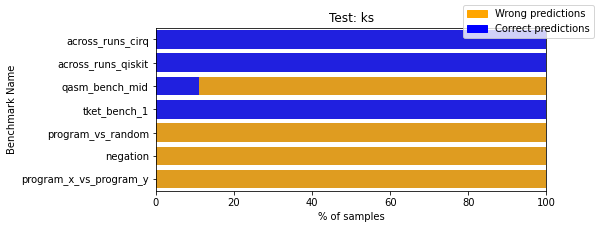

Threshold: 0.01


../lib/analyser.py:197: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_all["prediction_divergence"] = self.df_all["p_value"].apply(lambda e: e < treshold)
../lib/analyser.py:198: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_all["correct_prediction"] = self.df_all.apply(


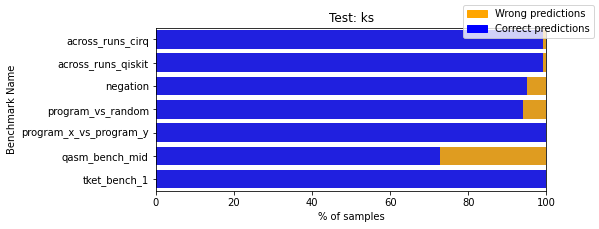

Threshold: 0.02


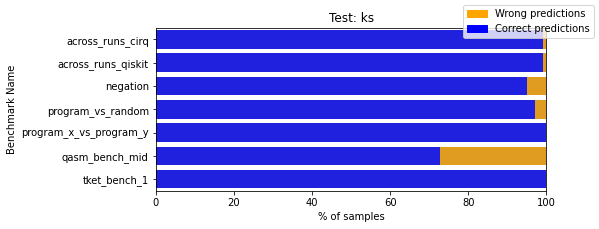

Threshold: 0.03


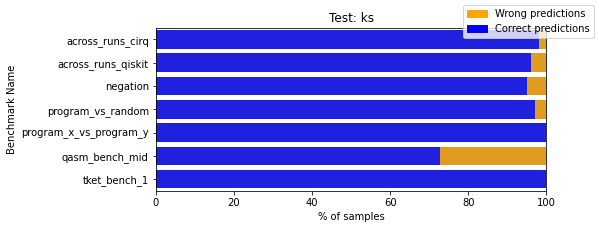

Threshold: 0.04


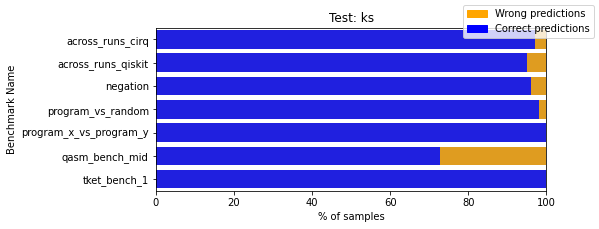

Threshold: 0.05


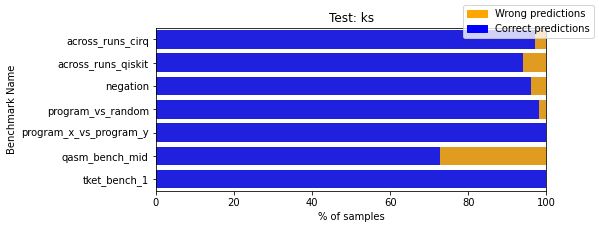

Threshold: 0.06


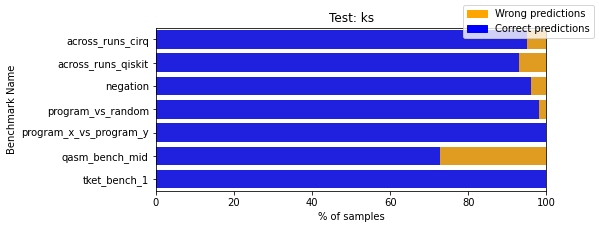

Threshold: 0.07


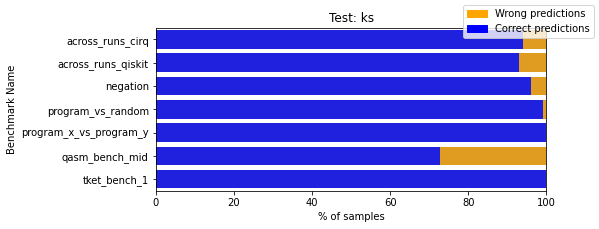

Threshold: 0.08


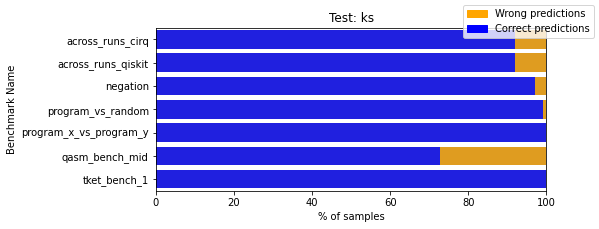

Threshold: 0.09


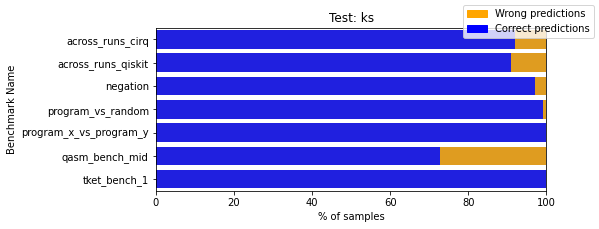

In [10]:
for threshold in np.arange(0, 0.1, 0.01):
    print(f"Threshold: {threshold}")
    exp_test_4_p_val_experiments.classify_based_on_pvalue(threshold)
    exp_test_4_p_val_experiments.focus_on_detector("ks")
    exp_test_4_p_val_experiments.plot_benchmark_categories()
    plt.show()

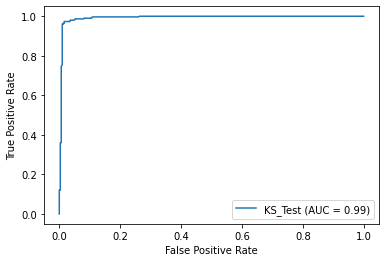

In [11]:
exp_test.classify_based_on_pvalue(0.05)
exp_test.focus_on_detector("ks")
exp_test.plot_ROC_curve(column_parameter='statistic', title="KS_Test", low_means_normal=True)

### Threshold on Statistic

In [12]:
# replace P-value
def replace_p_value(explorer, threshold_on_statistic, test_to_change):
    explorer.df_all["p_value"] = explorer.df_all.apply(
        lambda row: int(row["statistic"] < threshold_on_statistic) if row["test"] == test_to_change else row["p_value"],
        axis=1
    )
    
replace_p_value(
    explorer=exp_test_4_elbow_experiments, threshold_on_statistic=0.02, test_to_change='ks')

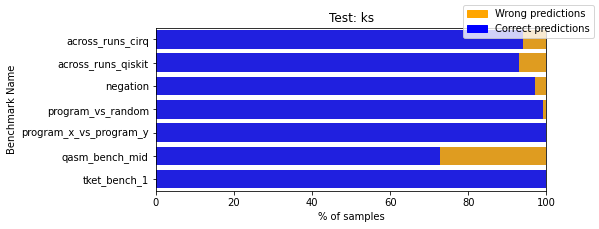

In [13]:
exp_test_4_elbow_experiments.classify_based_on_pvalue(0.05)
exp_test_4_elbow_experiments.focus_on_detector("ks")
exp_test_4_elbow_experiments.plot_benchmark_categories()
plt.show()

../lib/analyser.py:197: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_all["prediction_divergence"] = self.df_all["p_value"].apply(lambda e: e < treshold)
../lib/analyser.py:198: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_all["correct_prediction"] = self.df_all.apply(


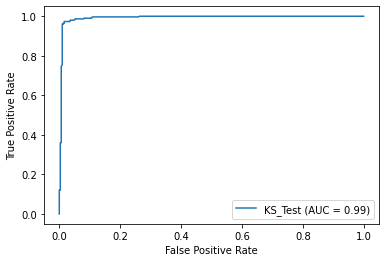

In [14]:
exp_test_4_elbow_experiments.classify_based_on_pvalue(0.05)
exp_test_4_elbow_experiments.focus_on_detector("ks")
exp_test_4_elbow_experiments.plot_ROC_curve(column_parameter='statistic', title="KS_Test", low_means_normal=True)

## Random Guess

In [16]:
exp_test_4_random = deepcopy(exp_test)

In [17]:
df_all = exp_test_4_random.df_all
# get results for only one test
df_all = df_all[df_all["test"] == "ks"]
n_records = len(df_all)
print(n_records)

611


<AxesSubplot:xlabel='count', ylabel='expected_divergence'>

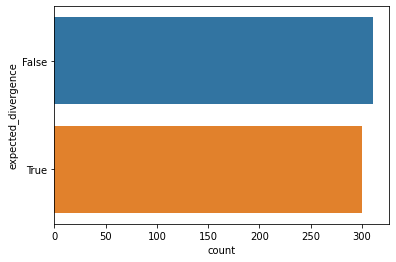

In [19]:
sns.countplot(
    data=df_all,
    y="expected_divergence"
)

In [24]:
random_p_values = np.random.choice([0,1], size=n_records)
df_all["p_value"] = random_p_values

In [25]:
exp_test_4_random.df_all = df_all

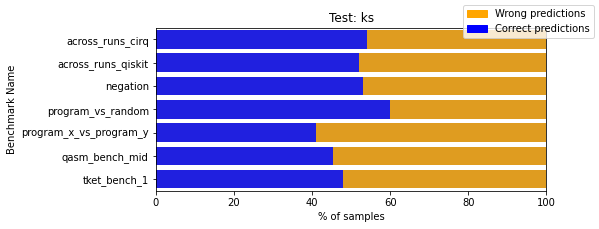

In [26]:
exp_test_4_random.classify_based_on_pvalue(0.05)
exp_test_4_random.focus_on_detector("ks")
exp_test_4_random.plot_benchmark_categories()
plt.show()

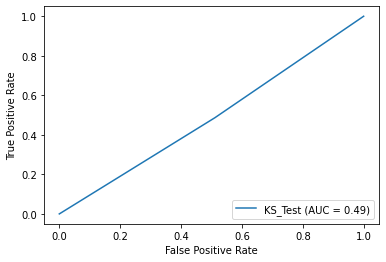

In [28]:
exp_test_4_random.classify_based_on_pvalue(0.05)
exp_test_4_random.focus_on_detector("ks")
exp_test_4_random.plot_ROC_curve(column_parameter='p_value', title="KS_Test", low_means_normal=True)